In [4]:
#| echo: false
# minimum libraries needed for some EDA/data prep code 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
data = pd.read_csv('us_used_cars_final.csv')
y = data.price

## Background / Motivation

Since buying a used car requires a level of trust between buyers and sellers, it's difficult to know what a good price is. We want to make a tool that buyers and sellers can use to facilitate the exchange.

This is also useful for us as college students and young people in the workforce with limited budgets but a need for a vehicle. 

## Problem statement 

The car industry is vast, and venturing into buying or selling a car can often be challenging, especially as the used car market is even harder to keep track off. Therefore, we want to create a model that can give potential buyers and sellers on overview of what to expect in price range.

## Data sources
*by Hiba Khatib*

The data we used is from Kaggle https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset. The original dataset has 3 million observations but we randomly sampled 6000 observations to used as our test and train data. This will help solve the problem because as it containts the price as well as ~50 other charactersitics describing cars that were sold used. From this data, we can build a model predicting car price to help potential sellers adjust heir expectations and potential buyers to get a reasonable price range for the car they are expecting to buy.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

*by Hiba Khatib* 

Our stakeholders are used car buyers, seller, and third-parties that enable these exchanges. 

Understanding the used cars market is important for several reasons, and developing a machine learning tool that predicts the price of a used car can be valuable for both individuals and used car dealerships. Here are some ways that our tool is significant: 

1. **Informed Decision-Making:** For individuals looking to buy or sell a used car, having knowledge about the current market conditions, trends, and prices is crucial. Understanding the used cars market allows buyers to make informed decisions regarding the fair value of a vehicle they are interested in purchasing. Similarly, sellers can accurately assess the appropriate price to ask for their used car, ensuring they receive a fair deal.

2. **Fair Pricing:** Predicting the price of a used car using machine learning can help establish fair and reasonable prices for both buyers and sellers. By considering various factors such as the car's make, model, year, mileage, and condition, our can provide an estimate that aligns with the prevailing market rates. This promotes transparency and prevents unfair price manipulation.

3. **Time and Cost Savings:** For buyers, a machine learning tool can save time and effort by quickly providing estimated prices for a wide range of used cars. Instead of manually researching and comparing prices, potential buyers can use the tool to narrow down their options and focus on vehicles within their budget. For sellers, having a reliable price prediction tool eliminates the need for extensive market research and allows them to set competitive prices efficiently.

4. **Negotiation Power:** When buying or selling a used car, negotiations are often involved. Having access to a machine learning tool that predicts prices empowers both parties during the negotiation process. Buyers can negotiate based on market insights, ensuring they are not overpaying, while sellers can justify their asking price with data-driven estimates.

5. **Business Optimization:** Used car dealerships can greatly benefit from a machine learning tool that predicts prices. It allows dealerships to assess the value of trade-ins accurately, determine competitive pricing strategies, and optimize inventory management. By understanding market trends and fluctuations, dealerships can make informed decisions that maximize profitability and customer satisfaction.

6. **Risk Mitigation:** Predicting the price of used cars can also help mitigate risk for both buyers and sellers. Buyers can avoid purchasing a vehicle at an inflated price by comparing the predicted price with the seller's offer. Sellers, on the other hand, can ensure they do not undervalue their vehicles and receive fair compensation for their assets.

Overall, understanding the used cars market and having a machine learning tool to predict prices is beneficial for individuals and used car dealerships. It facilitates informed decision-making, establishes fair pricing, saves time and effort, enhances negotiation power, optimizes business operations, and mitigates risks in the used car market.

## Data quality check / cleaning / preparation 
*Written by Hiba Khatib; code and data cleaning process done by both Hiba Khatib & Emily Leibfritz*

The standard deviation of the target variable before removing outliers 16742.99685916766
The mean of the target variable before removing outliers 24568.3835


C:\Users\hibar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


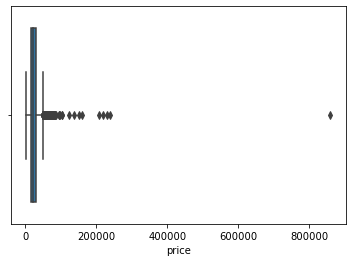

In [10]:
#| echo: false
sb.boxplot(y)
print("The standard deviation of the target variable before removing outliers", np.std(y))
print("The mean of the target variable before removing outliers", np.mean(y))

C:\Users\hibar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

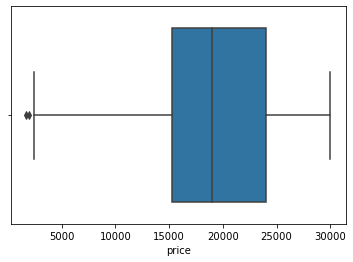

In [17]:
#| echo: false
new_y = y[y <= 30000]
sb.boxplot(new_y)

Mean of target price after dropping outliers:  19205.211827007945
Standard deviation:  5978.306973568847


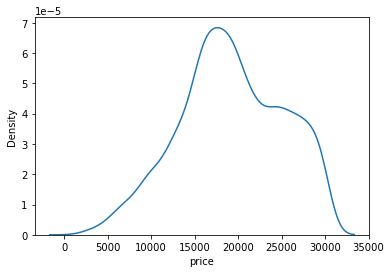

In [21]:
#| echo: false
sb.kdeplot(new_y)
print("Mean of target price after dropping outliers: ", np.mean(new_y))
print("Standard deviation: ", np.std(new_y))

In [26]:
### Distribution of most significant predictors
# the following code was done by Emily Leibfritz
import seaborn as sns

[]

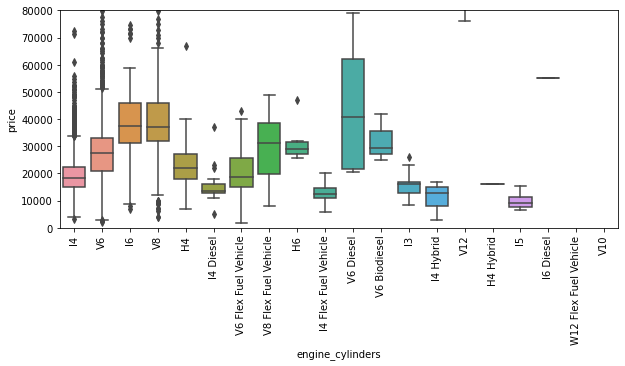

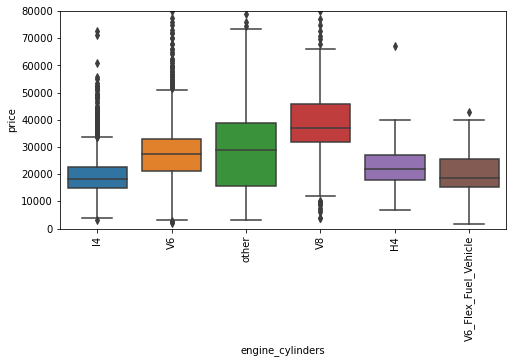

In [29]:
#| echo: false
plt.figure(figsize=(10,4))

sns.boxplot(x="engine_cylinders",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

data_2.engine_cylinders.value_counts()

data_2['engine_cylinders'] = data_2['engine_cylinders'].apply(lambda x: 'I4' if x == 'I4' else 
                                                          'V6' if x == 'V6' else
                                                          'V8' if x == 'V8' else
                                                          'V6_Flex_Fuel_Vehicle' if x == 'V6 Flex Fuel Vehicle' else
                                                          'H4' if x == 'H4' else
                                                          'other')
data_2.engine_cylinders.value_counts()

plt.figure(figsize=(8,4))
sns.boxplot(x="engine_cylinders",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

[]

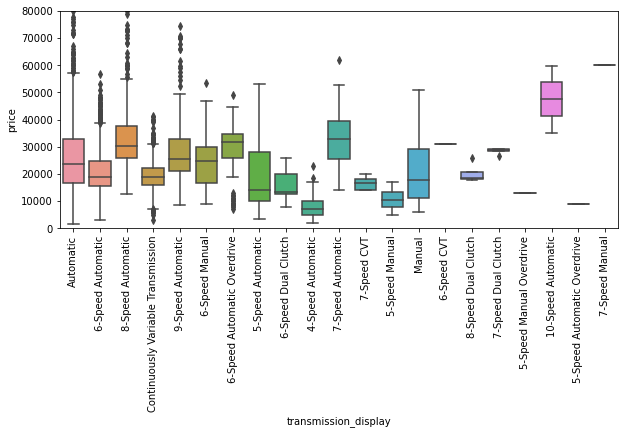

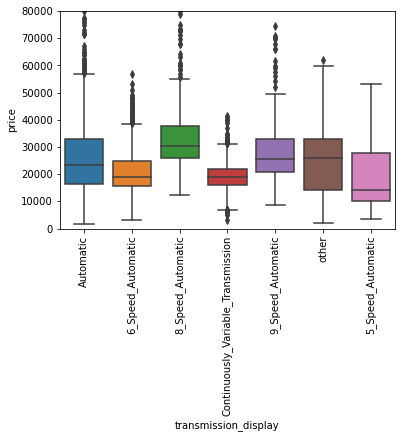

In [31]:
#| echo: false
plt.figure(figsize=(10,4))
sns.boxplot(x="transmission_display",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

data.transmission_display.value_counts().head()

data_2['transmission_display'] = data_2['transmission_display'].apply(lambda x: 'Automatic' if x == 'Automatic' else 
                                                          '6_Speed_Automatic' if x == '6-Speed Automatic' else
                                                          'Continuously_Variable_Transmission' if x == 'Continuously Variable Transmission' else
                                                          '8_Speed_Automatic' if x == '8-Speed Automatic' else
                                                          '9_Speed_Automatic' if x == '9-Speed Automatic' else
                                                          '6_Speed_Automatic' if x == '6-Speed Automatic' else
                                                          '5_Speed_Automatic' if x == '5-Speed Automatic' else
                                                          'other')
plt.figure(figsize=(6,4))
sns.boxplot(x="transmission_display",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

In [34]:
#| echo: false
# numerical data distributions
X = pd.read_csv('X.csv')
X.drop('Unnamed: 0', axis = 1, inplace = True)
X.describe()

,city_fuel_economy,engine_displacement,franchise_make,fuel_tank_volume,height,highway_fuel_economy,length,mileage,model_name,owner_count,...,trimId,wheelbase,width,year,wheel_system_cat,wheel_system_display_cat,body_type_Sedan,engine_cylinders_I4,engine_cylinders_V6,transmission_display_8_Speed_Automatic
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.00000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,...,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,22.123814,2653.520194,0.976826,17.239881,63.71748,29.835356,187.880755,50587.295299,1.203708,1.374752,...,66545.237696,110.453719,76.634937,2016.423085,2.440742,2.348267,0.331494,0.612668,0.269918,0.073714
std,4.370368,889.783980,1.181402,3.710306,5.77055,5.156303,12.964924,38325.667183,0.804647,0.699996,...,14455.076888,8.196206,6.360904,2.846164,0.998325,1.004233,0.470802,0.487194,0.443966,0.261334
min,11.000000,1000.000000,0.000000,9.200000,47.30000,15.000000,144.700000,10.000000,0.000000,1.000000,...,297.000000,90.900000,62.900000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2000.000000,0.000000,14.500000,57.90000,26.000000,180.550000,25122.500000,1.000000,1.000000,...,57983.000000,105.900000,72.300000,2016.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,2400.000000,1.000000,16.500000,65.40000,30.000000,187.400000,38403.000000,1.000000,1.000000,...,68658.000000,109.300000,73.400000,2017.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,25.000000,3500.000000,1.000000,19.000000,67.90000,34.000000,192.900000,66451.000000,2.000000,2.000000,...,76471.500000,112.500000,81.300000,2018.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000
max,37.000000,6200.000000,4.000000,36.000000,108.60000,43.000000,250.400000,294140.000000,4.000000,8.000000,...,92998.000000,164.600000,97.400000,2020.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


This is a summary of our main takeaways from the data prep and EDA: 

- The first thing we did was fix the data types of some of the columns. All of the boolean columns were encoded as True or False so we mapped those to 1s and 0s. Then, we found that several columns such as horsepower and torque were numerical but contained units. We removed all of the units from these columns and converted them back to numeric. 
- Then, we dropped a set of unique identifiers which were not sigificant to our analysis. We also dropped three columns which represented the interior, and exterior color of the car. These columns had different names for the same color and we did not see them as significant predictors to engineer and encode differently. 
- Then, we dropped a constant predictor which contained the same value for all observations as constant predictors don't provide any meaningful insights. 

- The final step in the cleaning and preparation of the numerical data, we dropped highly correlated features. These were features which represented the same information in two different ways such as the official name of a trim and the id associated with that name. This resulted in us keeping only 14 of the numerical predictors are subsetting for predictors with a correlation of |-.2|. 

- For the categorical columns, each was observed individually in order to find the best way to handle them, as just converting them all into dummies resulted in a huge dataset.

- Some columns with few unique values that showed a connection to the target variable were just converted into dummies, like body_type and transmission_display.

- Some columns, like engine_cylinders and transmission display had some values very common while others only had under 100 observations. These were grouped as others, and the columns were converted into dummies.

- Some columns like franchise_make and model_name had a too large amount of unique values to convert into dummies, so the observations were grouped by mean value of target variable, and assigned a number between 1-6.

- Some columns did not show any connection to the target variable, while often having a big amount of unique values, like the columns concerning the color of the vehicles, city or major_options. These columns were dropped.

- Some columns contained the same information given by other columns already, like the pairs trim&trimID, make_name&franchise_make, engine_type&engine_cylinders where each trim, engine_type and make_name were dropped.

## Exploratory data analysis
*Written by Hiba Khatib; EDA code was written by Hiba Khatib & Emily Leibfritz*

The main takeaway from the EDA was the way that some columns were encoded. Some of the numerical columns had units. We had to remove the units in order to truly observe the trends in the numerical data. Additionally, the most important takeaway was the outliers and their effects on the distribution of the data. We intially focused only on the plot of the target variable which indicated that a log transformation was necessary but after dropping the outliers, the target no longer required a transformation. 

We did not have missing data except for one observation. When I sampled the data from the original 3 million observation data set, I achieved a subset of the data with no missing values. One observation later caused issues because some of its columns had dashes -- instead of NaN or empty cells. After we performed data cleaning, this observation's missingness becamse apparent. We dropped this observation since it was one out of 4500+ observations and was not worth imputing. 

Please refer to the graphs above to explore some of our EDA and data prep. The project code contains extensive data cleaning and EDA which can not reasonably be included in the report. 

## Feature Selection 
*By Hiba Khatib*

I performed two main sets of feature selection as I later discuss in my MARS and Random Forest models. Below, I outlined some reasons as to why several methods of feature selection can be very beneficial for machine learning models: 

1. Robustness and Reliability: Using multiple feature selection techniques helps ensure the robustness and reliability of our ultimate machine learning model. Different feature selection methods have their own strengths and weaknesses, and by employing two distinct approaches, I can mitigate the limitations of each individual technique. This reduces the chances of overfitting or biased feature selection, leading to a more accurate and reliable model.

2. Bias and Variance Trade-off: the models have a clear trade-off between bias and variance. Bias refers to the model's assumptions and the error introduced by those assumptions, while variance refers to the model's sensitivity to changes in the training data. By employing two different feature selection methods, I can find the balance between bias and variance. If both methods consistently select certain features as important, it increases confidence in the model's decision. On the other hand, if there are discrepancies, it indicates the need for further investigation and analysis.

3. Validation of Feature Importance: Feature selection methods help identify the most relevant features for the model's predictive performance. By using two different types of feature selection, I was able to validate and cross-reference the importance of features across different techniques. If features consistently appear as important in both methods, it provides stronger evidence of their relevance. Conversely, if features are selected in one method but not the other, it signals the need for scrutiny and potential exploration of alternative feature sets.

I found the extensive methods for feature selection to be very helpful in developing my models and it was necessary as our models were initially overfitting a lot and had much more RMSEs than they do now. 

# DO THIS!
## Approach 

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model: Hyperparameter tuning

### CatBoost 
*By Yuan Zhang*

I used the cleaned data above and found the base CatBoost had very good performance with a train RMSE of 1199 and test RMSE of 2056. I thought it might be overfitting, so I used GridSearch to see if it could be better tuned. However, with the grid I set, the test RMSE all hovered around 2000 and 2500, while train RMSE was between 1000 and 1500 or overfitting even more with train RMSE under 1000. Therefore, I decided to use the base model as the final model.

Before making the CatBoost model, I also made AdaBoost and GradBoost models, but since performance was subpar to CatBoost, I decided not to attempt tuning them and focus on CatBoost instead.

### MARS & Bagging MARS 
*By Hiba Khatib*

For my part of the analysis, I performed two sets of feature selection: one using only MARS and no manual feature selection and one using RandomForestRegressor on our EDA feature selection. I ran all of my models against both data subsets to observe the difference resulting from our manual feature selection and the MARS feature selection. This was a way for me to check if the extensive feature selection I performed was too limiting or an accurate representation of the data and also allowed me to validate my results, providing more confidence in the resulting RMSEs and R2 scores. 

#### MARS

**For the features selected by the base MARS model:**

My initial MARS model was a base MARS model which gave me my MARS selected features. This model's results:

Base MARS Train RMSE: 2629.4932798721907

Base MARS Train R^2 0.8076510034139939

Base MARS Test RMSE: 2619.693255005516

Base MARS Test R^2 0.804504645951459

I tuned this MARS model's degree to get an optimal degree of 5. The tuned model's train RMSE was 2705 and its R2 was 0.796 and the test RMSE was 2680 with an R2 of 0.795. These results were slightly worse than the base MARS but this difference is only marginal and can be explained by inherent randomness and variability. This model had the least overfitting which was an initial issue we experienced. I improved the EDA and feature selection after our presentation in order to sucessfully minimize the overfitting.

Then I bagged the best individual MARS model. 

**For the features manually selected by my feature selection:**

The base MARS had a train RMSE of 2685 and a train R2 of 0.8 and a test RMSE of 2875 and a test R2 of 0.77.

Tuning this MARS model gave me an optimal degree of 6 and the resulting train RMSE and R2 were 2467 and 0.829 respectively and the test RMSE and R2 were 2744 and 0.789 respectively. There appears to be some slight overfitting and worsening of the model using the optimal degree. However the difference in R2 is marginal enough to be attributed to the inherent randomness. This may not be the case however considering how much worse the test RMSE is and the difference between the test and train RMSE. 


**For the features selected by the tree based methods:**
Base MARS train RMSE 3538.491879292508

Base MARS train R^2 0.6516769607249808

BASE MARS Test RMSE 3596.961825761306

BASE MARS Test R^2 0.6314408357381682

Upon observing these results, I did not continue using the tree based feature selection but only used my manual feature selection, which the rest of the group relied on, and the MARS feature selection. 

**Key takeaways**

The MARS selected features model seems to outperform the model developed on our subset. There is less overfitting despite the slightly worse R^2. This makes sense because the original MARS feature selection ensured that we kept the features which best represented the data and thus it is less likely to experience over or underfitting as in our selected features. The pruning ensures that the model is performing as optimally as possible with the base parameters. 

It is also important to note that the performance on the model with the tuned degree is not significantly better than the performance on the base MARS model with the MARS selected features.


#### Bagging MARS


There is not much to note about the bagging of the MARS models. I observed the same trends in the RMSE and R2 as described for the unbagged MARS models. 

The key result to note is that the best RMSE and R2 results from the tuned bagging model on the best MARS model. The best RMSE is 2615.7 and the best R2 is 0.81. 

**Analysis of overall results** 

I believe that unbagged MARS models may provide better results and less overfitting than bagged MARS models due to the following reasons:

1. **Simplicity of MARS models:** one advantage of MARS models is their interpretability and ability to describe non linear relationships between variables. Bagging these models can result in additional complexity which can make it harder to interpret relationships between predictors and the target variable. 
2. **Variance and Bagging:** Bagging should help in reducing the variance by taking the average predictions of multiple models. This may have led to increased variance in my case because the individual models that I am bagging may be highly correlated or similar. The unbagged models have lower variance inherently because they are not influenced by the variability of bootstrapping and sampling which results in more stable and reliable predictions. 
3. **Outliers:** MARS models are robust to outliers because they are piecewise functions. The bagging can possibly allow the outliers to have more influence and lead to overfitting.

### Random forest
*By Hiba Khatib*

#### Results on MARS feature selection: 

The base random forest resulted in a test RMSE of 2370 and test R2 of 0.84 and a train RMSE of 937. This is one of the highest test R2 we saw in our models but there is significant overfitting to the training data as can be seen by the very large difference between the test and train RMSE with the train RMSE being significantly smaller than the test RMSE. 

Upon running a coarse grid search, the overfitting problem improved tremendously as I saw a a train RMSE of 2115 and a test RMSE of 2512 and R2 of 0.82. Even though the test RMSE and R2 decreased after the coarse grid, the overfitting was not a large problem anymore. 

A finer grid search resulted in overfitting again but the test RMSE was 2411 which is roughly the average of the base random forest test RMSE and the coarse grid test RMSE. The R2 score was also roughly the average, 0.83. The train RMSE was 1760, again due to overfitting. 

The two parameters that changed the most throughout tuning were max_lead_nodes and n_estimators which are really sensitive tree based model parameters. I believe these parameters influenced the overfitting. 

There are two possible methods for improving the model and avoiding overfitting. These include regularization and more feature randomness. Further tuning of the number of trees, max depth and the min samples to split a node would significantly reduce the overfitting as it would avoid the model's fitting to the training data too closely. This is very clear for our model because greater depth of trees led to overfitting despite giving a better test RMSE. With respect to feature randomness, overfitting of random forest can occur if the random subset of features selected by the random forest is not large enough. Random forests select a random subset of features for each tree in order to decorrelate the trees and reduce overfitting. If the random subset is not controlled properly, then the model may fail to generalize to unseen data and results in correlation between trees which is results in an overfit and inadequate model. 

#### Results on manual feature selection: 

The base random forest resulted in a test RMSE of 2320 and R2 of 0.85 and a train RMSE of 811. 

I observed the same trends and issues with the coarse and fine grid search as described above. The consistency of this issue indicates that further hyperparameter tuning is necessary to optimize the model RMSE and R2 without causing issues such as significant overfitting. 

**Overall result** 

The best RMSE and R^2 resulted from the fine random forest grid search using our feature selection. This is because our feature selection was done using random forest. 

Our best random forest RMSE and R2 are 2385.598110495618 and 0.8408281485903418 respectively. 

### Decision Trees & CCP
*by Nicole Birova*

### XGBoost & LightGBM
*By Emily Liebfritz*

The xgboost model was built through hyperparameter tuning. Each parameter on its own was visualized at first, to get a general range of values that might work well. Then Randomized search() was used to find the best combination of hyperparameters. This process was repeated a few times, narrowing the range of the values of each hyperparameter down. The selected parameters at the end were then used to build the model. Early stopping was added to decrease overfitting, and the model was then bagged to further decrease the rmse.

The same process was repeated for LGMB regressor, although it failed to get results of the same quality as XGboost. 

## Model Ensemble 

# DO THIS! 
Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

### Innovative ensembling methods
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction

# DO THIS!
Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

# DO THIS!
## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Hiba Khatib</td>
    <td>MARS, Bagging MARS, Random Forest</td>
    <td>Data cleaning & preparation, EDA, Feature Selection</td>    
    <td>Cleaned all numerical data, numerical data visualizations & EDA, response visualizations and transformation, feature selection and tree based models/MARS feature selection, significant parts of report</td>
  </tr>
  <tr>
    <td>Emily Leibfritz</td>
    <td>XGBoost, LightGBM, Ridge and Lasso</td>
    <td>data cleaning & prep, EDA, categorical data prep</td>    
    <td>Cleaned and observed categorical data trends, categorical data visualizations & EDA, XGBoost and LGBM models, Lasso/Ridge analysis.</td>
  </tr>
    <tr>
    <td>Name</td>
    <td></td>
    <td></td>    
    <td></td>
  </tr>
    <tr>
    <td>Name</td>
    <td></td>
    <td></td>    
    <td></td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.